In [1]:
%matplotlib inline
import os, sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from os.path import join, isfile

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
#data_path = '/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/grid_search_FE_regular_with_id_xgb_models'
#data_path = '/home/ymm/kaggle/xgboost_hyperopt/scripts/xgb_model_features_0'
#data_path = '/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/final_xgb_models/combined_xgb_models_038'

data_path = '/home/ymm/kaggle/xgboost_hyperopt/scripts/subset_data/xgb_model_features'

In [3]:
def collect_feature_names(data_path, fea_name='feature', thres_name = None, thres = 10):
    csv_files = [f for f in os.listdir(data_path) if '.csv' in f]
    feature_names = set()
    for file_name in csv_files:
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        if thres_name is None:
            feature_names = feature_names.union(data[fea_name])
        else:
            feature_names = feature_names.union(data.loc[data[thres_name] > thres, fea_name])
            
    return feature_names


def combine_feature_importance_files(data_path, fea_name='feature', thres_name = None, thres = 10):
    csv_files = [f for f in os.listdir(data_path) if '.csv' in f]
    fea_imp = None
    file_counter = -1
    score_columns = []
    norm_score_columns = []
    
    for file_name in csv_files:
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        
        if thres_name is not None:
            data = data.loc[data[thres_name] > thres]
            
        data = data.set_index(fea_name)
        print data.shape
        file_counter += 1
        data.columns = ['{}_{}'.format(column, file_counter) for column in data.columns]
        score_columns.append('{}_{}'.format('fscore', file_counter))
        norm_score_columns.append('{}_{}'.format('norm_fscore', file_counter))
        if fea_imp is None:
            fea_imp = data
        else:
            fea_imp = pd.merge(fea_imp, data, how='outer', left_index=True, right_index=True)
    
    fea_imp['fscore_sum'] = fea_imp[score_columns].sum(axis=1)
    fea_imp['norm_fscore_sum'] = fea_imp[norm_score_columns].sum(axis=1)
    return fea_imp



def combine_feature_score(data_path, fea_name='feature', score_name = None):
    csv_files = [f for f in os.listdir(data_path) if '.csv' in f]
    fea_score = None
    
    for i, file_name in enumerate(csv_files):
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        data = data.set_index([fea_name])
        col_name = '{}_{}'.format(score_name, i)
        
        if fea_score is None:
            fea_score = pd.DataFrame()
        
        fea_score[col_name] = data[score_name]

            #fea_score = pd.merge(fea_score, data, how='outer', left_index=True, right_index=True)
            
    return fea_score

In [4]:
#tmp = combine_feature_importance_files(data_path)
#combined_imp = combine_feature_importance_files(data_path, thres_name = 'fscore')
combined_imp = combine_feature_importance_files(data_path)

(1232, 2)
(1280, 2)
(1309, 2)
(1295, 2)
(1283, 2)


In [5]:
print combined_imp.shape
combined_imp.tail()

(1691, 12)


,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,
time_ratio_value_index_diff_0,51.0,0.002467,63.0,0.003098,36.0,0.001729,72.0,0.003455,57.0,0.002817,279.0,0.013567
time_ratio_value_index_diff_1,44.0,0.002128,41.0,0.002016,32.0,0.001537,21.0,0.001008,22.0,0.001087,160.0,0.007777
time_sum,36.0,0.001741,56.0,0.002754,40.0,0.001922,32.0,0.001536,36.0,0.001779,200.0,0.009732
time_sum_index_diff_0,37.0,0.001790,38.0,0.001869,35.0,0.001681,42.0,0.002016,103.0,0.005091,255.0,0.012446
time_sum_index_diff_1,35.0,0.001693,32.0,0.001573,29.0,0.001393,22.0,0.001056,32.0,0.001582,150.0,0.007297


In [6]:
print combined_imp.shape
combined_imp.head()

(1691, 12)


,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,
L0_S0_F0,24.0,0.001161,55.0,0.002704,39.0,0.001873,13.0,0.000624,18.0,0.000890,149.0,0.007252
L0_S0_F10,13.0,0.000629,7.0,0.000344,26.0,0.001249,12.0,0.000576,9.0,0.000445,67.0,0.003243
L0_S0_F12,15.0,0.000726,23.0,0.001131,6.0,0.000288,16.0,0.000768,11.0,0.000544,71.0,0.003456
L0_S0_F14,7.0,0.000339,16.0,0.000787,8.0,0.000384,14.0,0.000672,12.0,0.000593,57.0,0.002775
L0_S0_F16,34.0,0.001644,56.0,0.002754,65.0,0.003122,33.0,0.001584,19.0,0.000939,207.0,0.010043


In [7]:
## sort by the norm_fscore_sum
sorted_combined_imp = combined_imp.sort_values(by=['norm_fscore_sum'], ascending=False)

In [11]:
sorted_combined_imp.tail(20)

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,
L2_S27_F3148,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000048,NaN,NaN,1.0,0.000048
start_time_sorted_L3_S33_F3865_diff_1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000048,NaN,NaN,1.0,0.000048
L3_S31_D3844,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000048,NaN,NaN,1.0,0.000048
L0_S11_D284,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000048,NaN,NaN,1.0,0.000048
dat_L3_S43_var_index_diff_1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000048,NaN,NaN,1.0,0.000048
L2_S28_F3292,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000048,NaN,NaN,1.0,0.000048
L1_S25_F2451,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000048,NaN,NaN,1.0,0.000048
L1_S25_F2458,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000048,NaN,NaN,1.0,0.000048
L1_S25_F2466,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000048,NaN,NaN,1.0,0.000048


In [10]:
sorted_combined_imp.head(50)

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,
first_time_value_index_diff_1,97.0,0.004692,163.0,0.008015,189.0,0.009079,147.0,0.007055,94.0,0.004646,690.0,0.033487
L3_S30_F3704,153.0,0.007400,123.0,0.006048,49.0,0.002354,162.0,0.007775,186.0,0.009194,673.0,0.032771
L3_S29_F3351,150.0,0.007255,201.0,0.009883,79.0,0.003795,71.0,0.003407,168.0,0.008304,669.0,0.032645
L1_S24_F1723,124.0,0.005998,128.0,0.006294,138.0,0.006629,110.0,0.005279,155.0,0.007662,655.0,0.031861
L3_S33_F3865,126.0,0.006094,98.0,0.004819,130.0,0.006245,184.0,0.008830,85.0,0.004201,623.0,0.030190
num_L3_S33_var_index_diff_0,113.0,0.005466,83.0,0.004081,148.0,0.007110,201.0,0.009646,75.0,0.003707,620.0,0.030010
cat_max,118.0,0.005707,113.0,0.005556,178.0,0.008551,82.0,0.003935,60.0,0.002966,551.0,0.026716
dat_L3_var_index_diff_0,104.0,0.005030,128.0,0.006294,141.0,0.006773,94.0,0.004511,77.0,0.003806,544.0,0.026415
L1_S24_F1846,134.0,0.006481,79.0,0.003885,67.0,0.003219,139.0,0.006671,116.0,0.005734,535.0,0.025989


In [12]:
nan_boolean_index = sorted_combined_imp.isnull().sum(axis=1) == 0

In [13]:
nan_removed_df = sorted_combined_imp[nan_boolean_index]

In [16]:
print nan_removed_df.shape

(908, 12)


,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,
L1_S24_F1599,5.0,0.000242,1.0,0.000049,1.0,0.000048,2.0,0.000096,1.0,0.000049,10.0,0.000484
L3_S38_D3953,4.0,0.000193,1.0,0.000049,1.0,0.000048,3.0,0.000144,1.0,0.000049,10.0,0.000484
start_time-index_sorted_dat_L0_mean_diff_0,2.0,0.000097,1.0,0.000049,1.0,0.000048,1.0,0.000048,4.0,0.000198,9.0,0.000440
start_time-index_sorted_min_time_diff_0,3.0,0.000145,2.0,0.000098,1.0,0.000048,1.0,0.000048,2.0,0.000099,9.0,0.000438
L1_S24_F1838,2.0,0.000097,2.0,0.000098,2.0,0.000096,1.0,0.000048,2.0,0.000099,9.0,0.000438
L3_S29_F3398,2.0,0.000097,3.0,0.000148,2.0,0.000096,1.0,0.000048,1.0,0.000049,9.0,0.000438
start_time_sorted_last_time_value_diff_0,3.0,0.000145,2.0,0.000098,1.0,0.000048,2.0,0.000096,1.0,0.000049,9.0,0.000437
dat_L0_S20_max,2.0,0.000097,2.0,0.000098,1.0,0.000048,3.0,0.000144,1.0,0.000049,9.0,0.000437
L3_S41_F4014,4.0,0.000193,1.0,0.000049,2.0,0.000096,1.0,0.000048,1.0,0.000049,9.0,0.000436


In [28]:
nan_removed_df.head(20)

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,
first_time_value_index_diff_1,97.0,0.004692,163.0,0.008015,189.0,0.009079,147.0,0.007055,94.0,0.004646,690.0,0.033487
L3_S30_F3704,153.0,0.007400,123.0,0.006048,49.0,0.002354,162.0,0.007775,186.0,0.009194,673.0,0.032771
L3_S29_F3351,150.0,0.007255,201.0,0.009883,79.0,0.003795,71.0,0.003407,168.0,0.008304,669.0,0.032645
L1_S24_F1723,124.0,0.005998,128.0,0.006294,138.0,0.006629,110.0,0.005279,155.0,0.007662,655.0,0.031861
L3_S33_F3865,126.0,0.006094,98.0,0.004819,130.0,0.006245,184.0,0.008830,85.0,0.004201,623.0,0.030190
num_L3_S33_var_index_diff_0,113.0,0.005466,83.0,0.004081,148.0,0.007110,201.0,0.009646,75.0,0.003707,620.0,0.030010
cat_max,118.0,0.005707,113.0,0.005556,178.0,0.008551,82.0,0.003935,60.0,0.002966,551.0,0.026716
dat_L3_var_index_diff_0,104.0,0.005030,128.0,0.006294,141.0,0.006773,94.0,0.004511,77.0,0.003806,544.0,0.026415
L1_S24_F1846,134.0,0.006481,79.0,0.003885,67.0,0.003219,139.0,0.006671,116.0,0.005734,535.0,0.025989


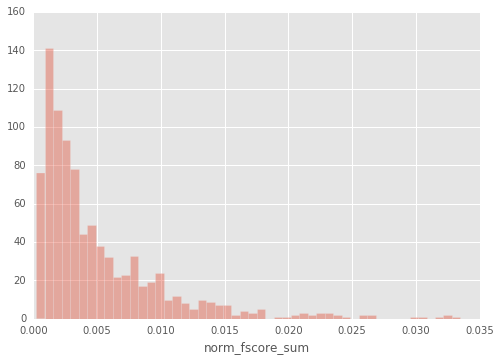

In [27]:
#sns.distplot(sorted_combined_imp['norm_fscore_sum'], bins=50, kde=False)
sns.distplot(nan_removed_df['norm_fscore_sum'], bins=50, kde=False)

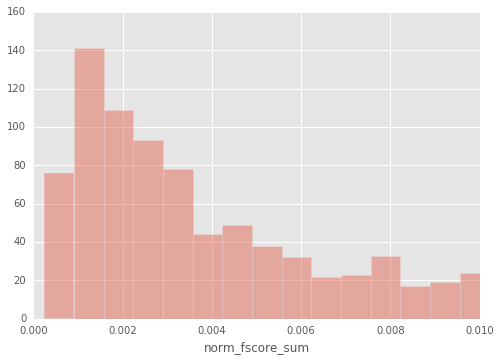

In [30]:
plt.xlim(0, 0.01)
#sns.distplot(sorted_combined_imp['norm_fscore_sum'], bins=50, kde=False)
sns.distplot(nan_removed_df['norm_fscore_sum'], bins=50, kde=False)

In [19]:
sorted_combined_imp.shape

(1691, 12)

In [33]:
sum(sorted_combined_imp['norm_fscore_sum'] >= 0.005)

313

In [ ]:
sorted_combined_imp.head()

In [ ]:
missing_row_counts = sorted_combined_imp.isnull().sum(axis=1)

In [ ]:
sum(missing_row_counts > 0)

In [ ]:
sorted_combined_imp.tail(200)

In [ ]:
plt.hist(combined_imp['norm_fscore_sum'], bins=50)

In [ ]:
plt.hist(combined_imp['norm_fscore_sum'], bins=50)
plt.gca().set_yscale("log")

In [ ]:
sorted_combined_imp.to_csv('~/full_data_xgb_feature_importance.csv')

In [ ]:
top_variable = combined_imp.sort('fscore_sum')[-300:].index

In [ ]:
for col in top_variable:
    if col in train_cat_cols.columns:
        print col

In [ ]:
raw_data_path = '/home/ymm/bosch/'

train_num_file   = 'train_numeric.csv'
train_cat_file   = 'train_categorical.csv'
train_date_file  = 'train_date.csv'
test_num_file    = 'test_numeric.csv'
test_cat_file    = 'test_categorical.csv'
test_date_file   = 'test_date.csv'
sample_submission_file   = 'sample_submission.csv'

start_time_column_name = 'L0_S0_D1'
id_column_name = 'Id'
dep_var_name = 'Response'

train_cat_cols = pd.read_csv(join(raw_data_path, train_cat_file), index_col=id_column_name, nrows=0)
train_date_cols = pd.read_csv(join(raw_data_path, train_date_file), index_col=id_column_name, nrows=0)
train_num_cols = pd.read_csv(join(raw_data_path, train_num_file), index_col=id_column_name, nrows=0)

In [ ]:
## important column disribution
print sum(train_num_cols.columns.isin(combined_imp.index)), sum(train_cat_cols.columns.isin(combined_imp.index)), sum(train_date_cols.columns.isin(combined_imp.index))

In [ ]:
selected_cat_col_names = train_cat_cols.columns[train_cat_cols.columns.isin(combined_imp.index)]

In [ ]:
selected_combined_imp = combined_imp.ix[selected_cat_col_names]

In [ ]:
print selected_combined_imp.shape
selected_combined_imp.head()

In [ ]:
bin_NaN_data_path = '/home/ymm/kaggle/bosch/data_2_bins_xgb_combined_models/data_bin_NaN_models'
combined_nan_imp = combine_feature_importance_files(bin_NaN_data_path, thres_name = 'fscore')

In [ ]:
common_col_names = set(combined_nan_imp.index).intersection(set(combined_imp.index))

In [ ]:
print len(combined_imp.index), len(common_col_names), len(combined_nan_imp)

In [ ]:
combined_nan_imp.ix[common_col_names]

In [ ]:
combined_nan_imp.head()

### Analysis on  models trained by 160 features

In [ ]:
'''
data_files =  [f for f in os.listdir(data_path) if '.csv' in f]
data = pd.read_csv(join(data_path, data_files[0]), index_col=0)
tmp = data.loc[data['fscore']>10 ,'feature']
'''

In [ ]:
single_xgb_fea_imp = pd.read_csv('/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/final_xgb_models/final_single_160fea_xgb_models/combinedModel_indexed_0_Xgboost_model_feature_importance.csv', index_col=0)

In [ ]:
print single_xgb_fea_imp.shape
single_xgb_fea_imp.tail(30)

In [ ]:
for fea in single_xgb_fea_imp['feature'].tolist():
    if 'index_diff' in fea:
        print single_xgb_fea_imp[single_xgb_fea_imp['feature'] == fea]

In [ ]:
'dat_L0_mean' in single_xgb_fea_imp['feature'].tolist()

In [ ]:
data_path = '/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/cross_validate_processed_150_fea_full_data_xgb_models_0'
combined_imp = combine_feature_importance_files(data_path)

In [ ]:
print combined_imp.shape
combined_imp.head()

In [ ]:
sorted_combined_imp = combined_imp.sort_values(by=['norm_fscore_sum'], ascending=False)

In [ ]:
sorted_combined_imp.head(30)

In [ ]:
'start_time' in sorted_combined_imp['norm_fscore_sum'].tolist()

In [ ]:
sorted_combined_imp['norm_fscore_sum'][:50]